In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime
import calendar

In [2]:
pd.read_csv("Uber Drives.csv")

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [3]:
data = pd.read_csv("Uber Drives.csv")
data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [4]:
data.head(2)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN


In [5]:
data.isnull()   #checks for missing values

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [6]:
#To check all the trues
data.isnull().any()      # value is only missing in purpose column

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [7]:
data.isnull().sum()   #checks for the number of NAN

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [12]:
data = data.dropna()    #drops the NAN

In [13]:
data.isnull().sum()  #this shows that NAN has been removed

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [15]:
data.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [18]:
# python does not recognize the date format on the dataset as a date. let us correct it
data["START_DATE*"] = pd.to_datetime(data["START_DATE*"], format = "%m/%d/%Y %H:%M")
data["END_DATE*"] = pd.to_datetime(data["END_DATE*"], format = "%m/%d/%Y %H:%M")

C:\Users\MAC\AppData\Local\Temp\ipykernel_8936\3441226706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["START_DATE*"] = pd.to_datetime(data["START_DATE*"], format = "%m/%d/%Y %H:%M")
C:\Users\MAC\AppData\Local\Temp\ipykernel_8936\3441226706.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["END_DATE*"] = pd.to_datetime(data["END_DATE*"], format = "%m/%d/%Y %H:%M")


In [19]:
data.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [23]:
#Extract the date and time
hour = []
day = []
dayofweek = []
month = []
weekday = []
monthname = []

for x in data["START_DATE*"]:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
    monthname.append(calendar.month_name[month[-1]])
    
data["HOUR"] = hour
data["DAY"] = day
data["DAY OF WEEK"] = dayofweek
data["MONTH"] = month
data["WEEKDAY"] = weekday
data["MONTH NAME"] = monthname
    

C:\Users\MAC\AppData\Local\Temp\ipykernel_8936\2306021676.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["HOUR"] = hour
C:\Users\MAC\AppData\Local\Temp\ipykernel_8936\2306021676.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["DAY"] = day
C:\Users\MAC\AppData\Local\Temp\ipykernel_8936\2306021676.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [24]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY,MONTH NAME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday,January
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday,January


In [25]:
data["CATEGORY*"].value_counts()   #to check various categories

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

<Axes: xlabel='CATEGORY*', ylabel='count'>

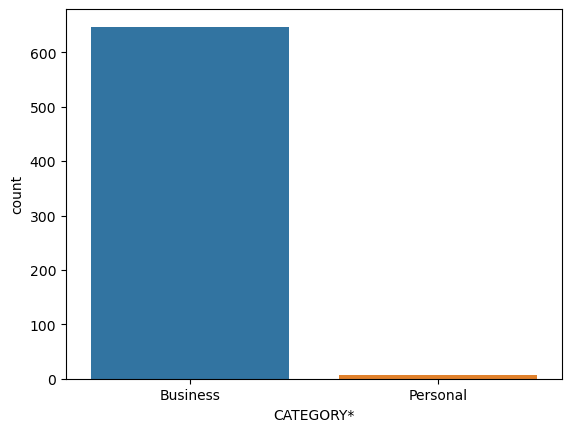

In [26]:
sns.countplot(data = data, x = "CATEGORY*")

<Axes: xlabel='HOUR', ylabel='count'>

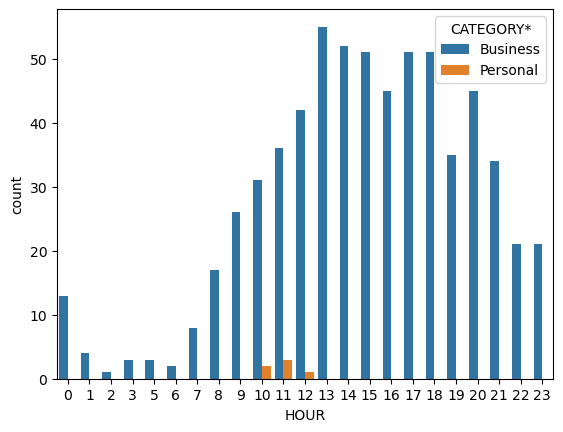

In [33]:
# Let us find out how long people travel with uber
sns.countplot(data = data, x = "HOUR", hue = "CATEGORY*")

<Axes: ylabel='Frequency'>

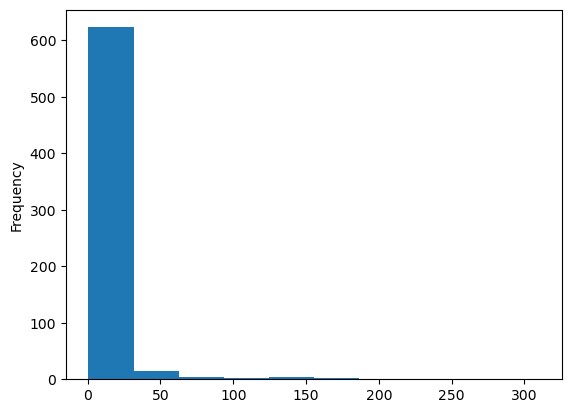

In [31]:
data["MILES*"].plot.hist()   #This means that a lot of people book for short miles

Text(0.5, 1.0, 'Number of trips Vs Hours')

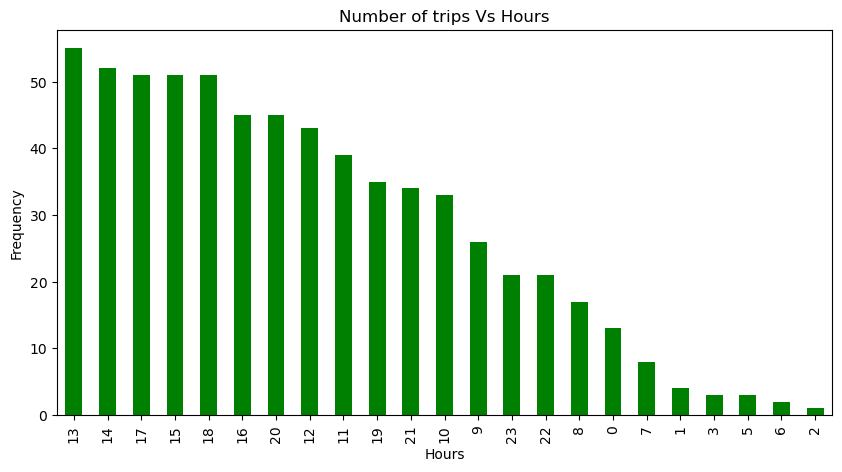

In [38]:
hours = data["START_DATE*"].dt.hour.value_counts()  #Hours most people take uber to their destinations
hours.plot(kind = "bar", color = "green", figsize = (10,5))

plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.title("Number of trips Vs Hours")    # most people book trips around 1pm(13)

## Purpose of the trip

<Axes: >

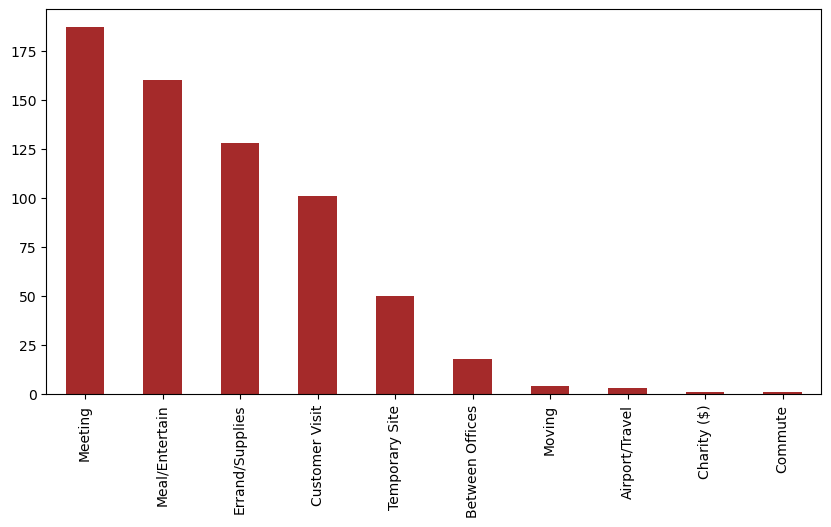

In [39]:
data["PURPOSE*"].value_counts().plot(kind = "bar", figsize = (10,5), color = "brown")

## Which day has the highest number of trips

<Axes: >

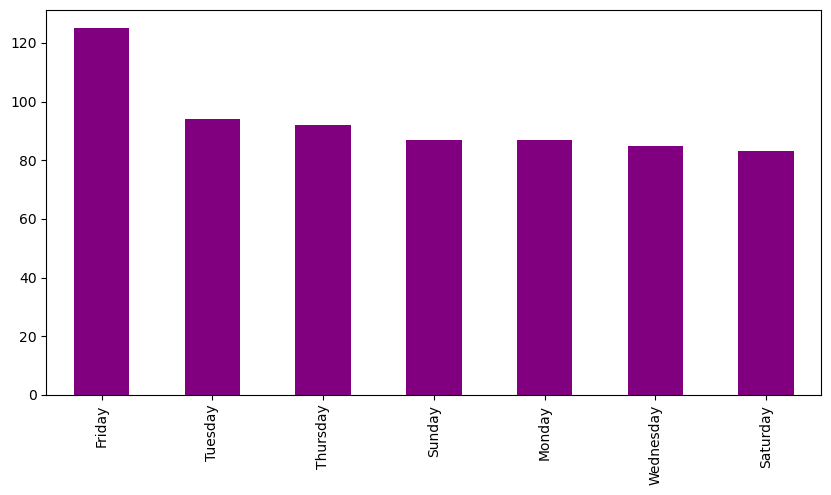

In [40]:
data["WEEKDAY"].value_counts().plot(kind = "bar", figsize = (10,5), color = "purple")

## What are the number of trips per each day

<Axes: >

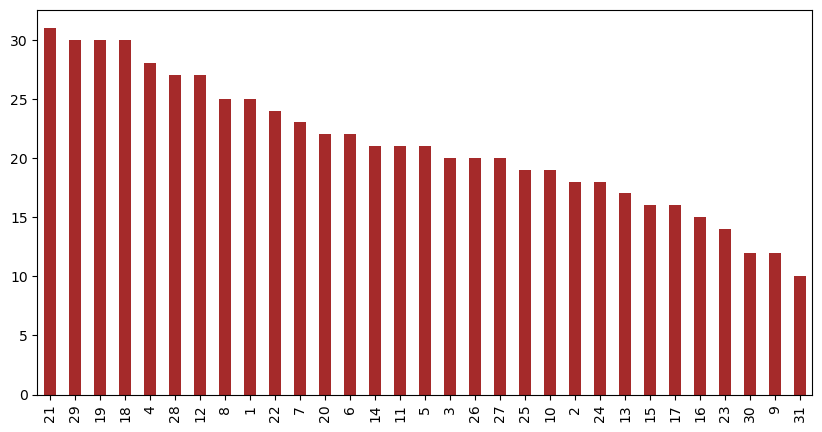

In [44]:
data["DAY"].value_counts().plot(kind = "bar", figsize = (10,5), color = "brown")

In [42]:
data.head(2)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY,MONTH NAME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday,January


<Axes: >

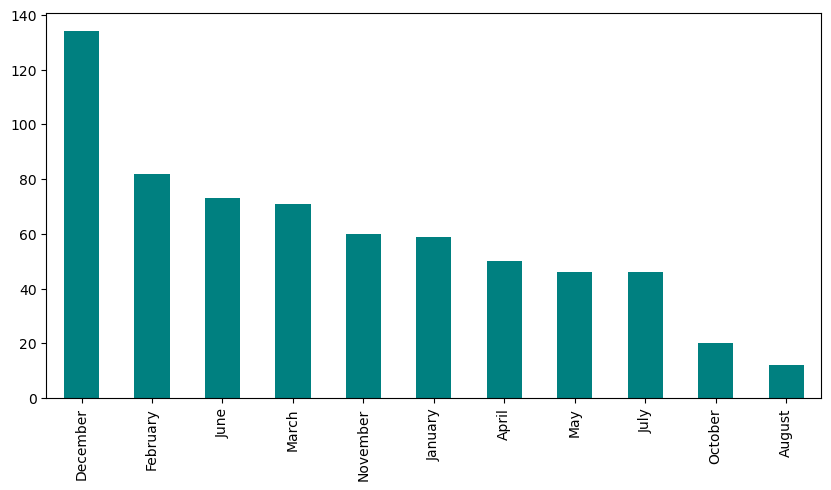

In [47]:
data["MONTH NAME"].value_counts().plot(kind = "bar", figsize = (10,5), color = "teal")

## The starting point of trips. Where do people start boarding their trips from most

<Axes: >

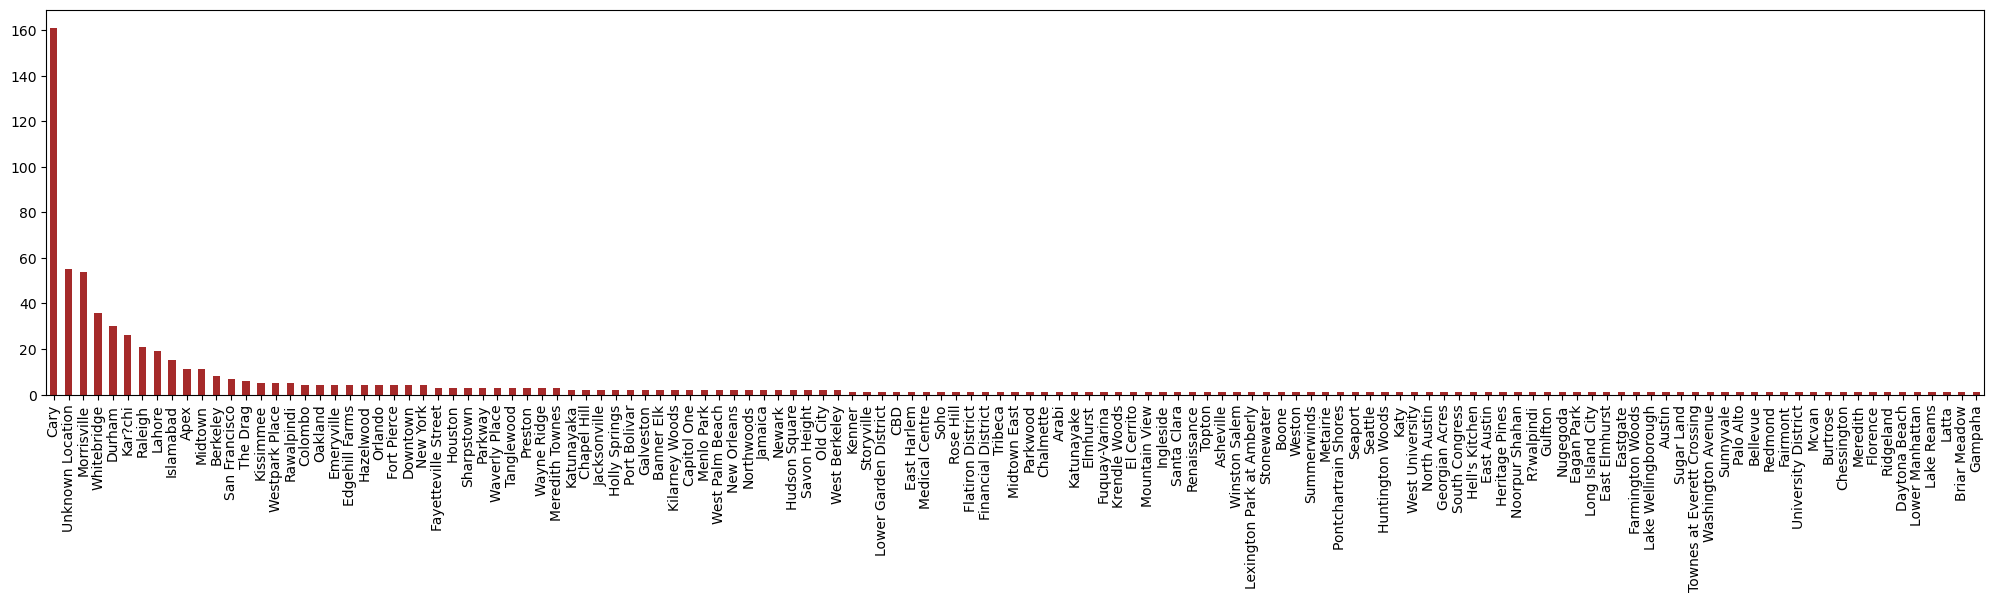

In [49]:
data["START*"].value_counts().plot(kind = "bar", figsize = (25,5), color = "brown")